# Part 3: Exploratory Data Analysis

In [0]:
# making date the dataframe index 
# googl_four_df.index = googl_four_df['Date']
googl_four_df = googl_four_df.set_index('Date')
googl_four_df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2013-01-02,359.71,363.50,358.28,361.62,5083536,0
2013-01-03,362.32,365.96,360.36,361.84,4636280,0
2013-01-04,364.67,370.74,363.84,368.98,5527104,0
2013-01-07,367.72,369.69,365.29,367.38,3311534,0
2013-01-08,367.77,368.15,362.22,366.65,3352074,0


In [0]:
# creating an avg between the high and low prices 

googl_four_df['avg'] = googl_four_df.apply(lambda row: (row.High + row.Low) / 2, axis=1)
googl_four_df.head()

,Open,High,Low,Close,Volume,OpenInt,avg
Date,,,,,,,
2013-01-02,359.71,363.50,358.28,361.62,5083536,0,360.890
2013-01-03,362.32,365.96,360.36,361.84,4636280,0,363.160
2013-01-04,364.67,370.74,363.84,368.98,5527104,0,367.290
2013-01-07,367.72,369.69,365.29,367.38,3311534,0,367.490
2013-01-08,367.77,368.15,362.22,366.65,3352074,0,365.185


In [0]:
googl_df['avg'] = googl_df.apply(lambda row: (row.High + row.Low) / 2, axis=1)


In [0]:
# summary statistics

mea = googl_four_df['avg'].mean()
mi = googl_four_df['avg'].min()
ma = googl_four_df['avg'].max()
med = googl_four_df['avg'].median()
sd = googl_four_df['avg'].std()

print('mean: ', mea)
print('median: ', med)
print('min: ', mi)
print('max: ', ma)
print('sd', sd)

mean:  598.2381076388884
median:  569.85
min:  350.21500000000003
max:  833.49
sd 127.5479561189933


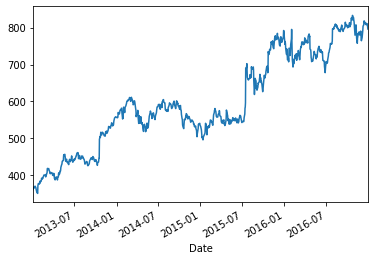

In [0]:
googl_four_df['avg'].plot.line()

In [0]:
googl_four_df['Year'] = googl_four_df.index.year
googl_four_df['Month'] = googl_four_df.index.month
googl_four_df['Weekday Name'] = googl_four_df.index.weekday_name

import calendar
googl_four_df['Month Name'] = googl_four_df['Month'].apply(lambda x: calendar.month_abbr[x])

googl_four_df.head()

,Open,High,Low,Close,Volume,OpenInt,avg,Year,Month,Weekday Name,Month Name
Date,,,,,,,,,,,
2013-01-02,359.71,363.50,358.28,361.62,5083536,0,360.890,2013,1,Wednesday,Jan
2013-01-03,362.32,365.96,360.36,361.84,4636280,0,363.160,2013,1,Thursday,Jan
2013-01-04,364.67,370.74,363.84,368.98,5527104,0,367.290,2013,1,Friday,Jan
2013-01-07,367.72,369.69,365.29,367.38,3311534,0,367.490,2013,1,Monday,Jan
2013-01-08,367.77,368.15,362.22,366.65,3352074,0,365.185,2013,1,Tuesday,Jan


In [0]:
googl_four_df.groupby('Year')['avg'].count()

Year
2013    252
2014    252
2015    252
2016    252
Name: avg, dtype: int64

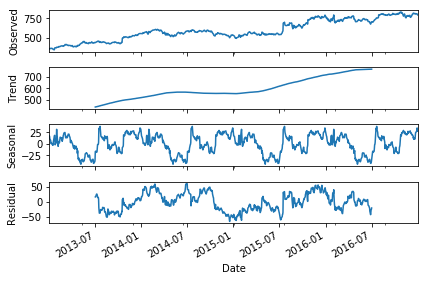

In [0]:
# plotting decomposition of time series 

import statsmodels.api as sm 
import matplotlib

# note that freq=253 since there are 252 trading days in the years (see above cell)
decomp = sm.tsa.seasonal_decompose(googl_four_df['avg'], model = 'additive',freq=252)
f = decomp.plot()
matplotlib.rcParams['figure.figsize'] = [9.0, 5.0]

There is a clear indication of trend, seasonality, and patterns in the residuals. 

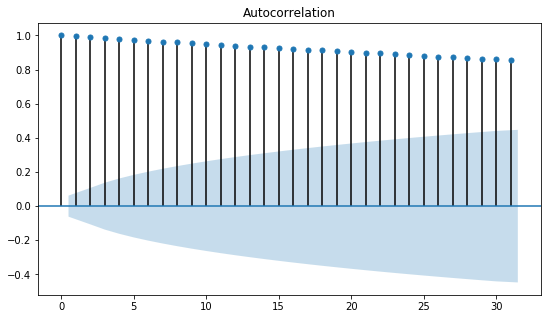

In [0]:
# plotting ACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(googl_four_df['avg'])
plt.show()

The trend in the ACF indicates seasonality is present. 

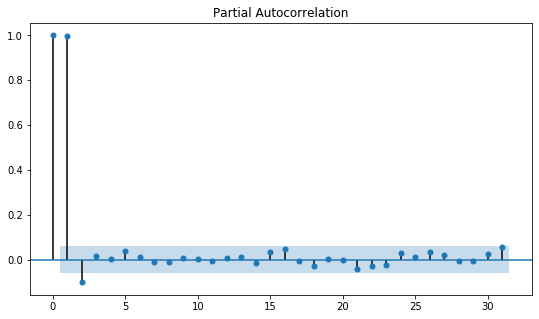

In [0]:
# plotting PACF

plot_pacf(googl_four_df['avg'])
plt.show()

The spikes in the PACF indicate that lags 1 and 2 may be potential values for p in an Autoregressive formula. 

Text(0, 0.5, 'Price')

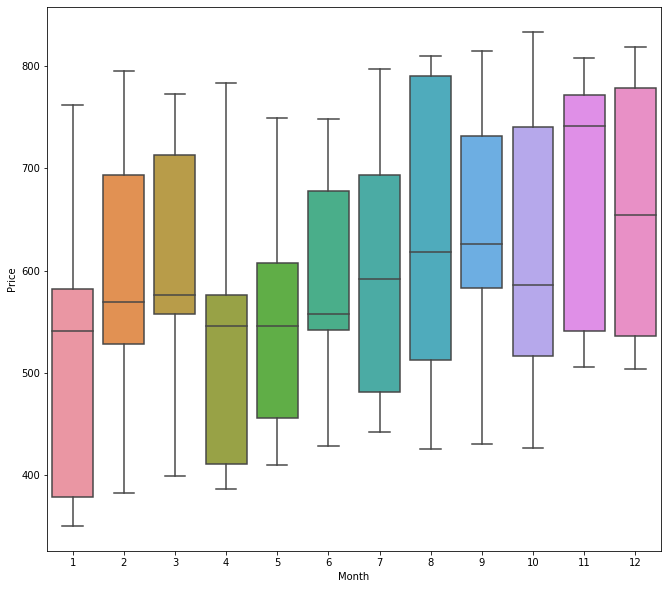

In [0]:
# boxplots to observe seasonality 

import seaborn as sns 
fig, axes = plt.subplots(1, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=googl_four_df, x='Month', y='avg', ax=axes)
axes.set_ylabel('Price')


There is clear seasonality. 